## Imports / Load Data

In [2]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('../data/raw/data_2020_05.csv', parse_dates=['ts'])

## EDA

In [4]:
df.head()

,in_room,rr,hr,ts,user_id
0,False,0.0,93.546196,2019-03-20 03:00:00,1
1,False,0.0,-1.000000,2019-03-20 03:01:00,1
2,False,0.0,-1.000000,2019-03-20 03:02:00,1
3,False,0.0,98.374496,2019-03-20 03:03:00,1
4,False,0.0,94.692595,2019-03-20 03:04:00,1


In [5]:
df_inroom = df[df.in_room == True]
df_inroom.groupby('user_id').describe()

rr                                                             \
          count       mean       std  min        25%        50%        75%   
user_id                                                                      
1        3194.0  14.293831  6.222046 -1.0  13.648116  15.529765  17.390330   
2        4422.0  14.200924  6.858611 -1.0  13.105388  15.628623  18.461682   
3        3972.0  14.735624  6.959027 -1.0  12.873555  15.781025  19.201973   
4        7160.0  18.583194  4.057901 -1.0  17.465726  19.197486  20.813140   
5        3256.0  16.646324  5.651287 -1.0  15.602341  18.425551  19.756602   

                        hr                                             \
               max   count       mean        std  min  25%        50%   
user_id                                                                 
1        31.429786  3194.0  46.083223  33.285395 -1.0 -1.0  60.852576   
2        31.640625  4422.0  38.978068  38.072456 -1.0 -1.0  58.437624   
3        32.226562  3972.0  40.358586  36.051453 -1.0 -1.0  61.775281   
4        32.556906  7160.0  48.512309  34.550151 -1.0 -1.0  65.672587   
5        32.802815  3256.0  49.294412  32.951383 -1.0 -1.0  64.416453   

                                
               75%         max  
user_id                         
1        68.717291  120.000000  
2        72.737170   99.609375  
3        69.418431   99.609375  
4        74.183239   99.609375  
5        71.826167   97.349330

### User 1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


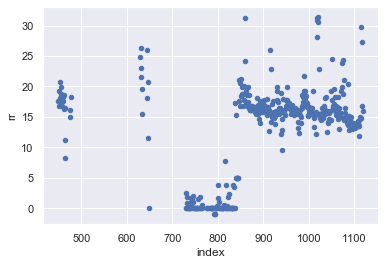

In [18]:
df_inroom_1 = df[(df.in_room == True) & (df.user_id == 1)]
df_inroom_list = [df[(df.in_room == True) & (df.user_id == i)] for i in range(1,6)]
df_inroom_1.reset_index()[100:500].plot.scatter(x='index', y='rr')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


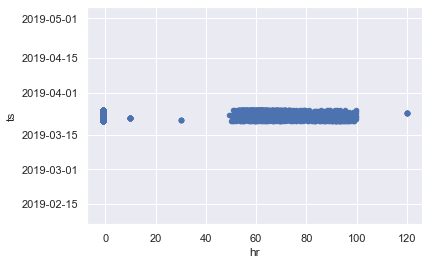

In [7]:
df_inroom_1.plot.scatter(x='hr', y='ts')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


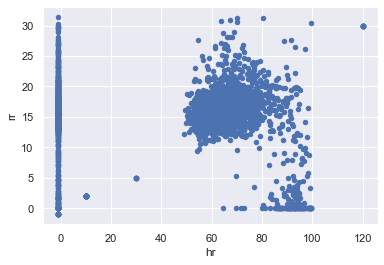

In [8]:
df_inroom_1.plot.scatter(x='hr', y='rr')

### All users

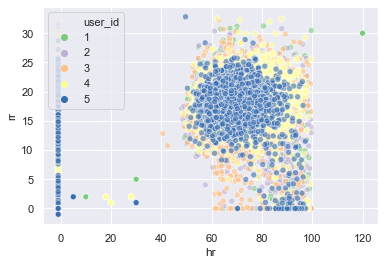

In [9]:
ax = sns.scatterplot(x='hr', y='rr', hue='user_id', palette="Accent", data=df_inroom, alpha=0.6)
plt.legend(loc='upper left')

(737138.3430555556, 737319.0909722223)

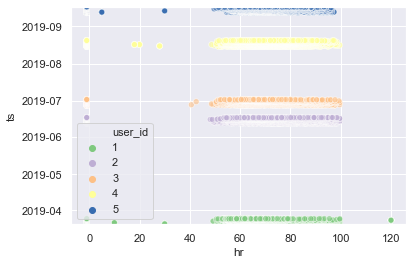

In [10]:
ax = sns.scatterplot(x='hr', y='ts', hue='user_id', palette="Accent", data=df_inroom, alpha=0.6)
plt.legend(loc='lower left')
ax.set_ylim(df_inroom.ts.min(), df_inroom.ts.max())

(737138.3430555556, 737319.0909722223)

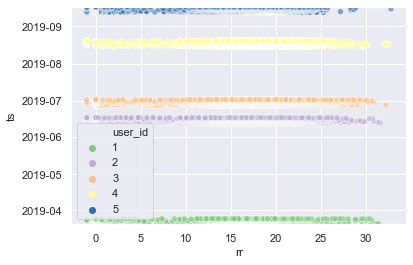

In [11]:
ax = sns.scatterplot(x='rr', y='ts', hue='user_id', palette="Accent", data=df_inroom, alpha=0.6)
plt.legend(loc='lower left')
ax.set_ylim(df_inroom.ts.min(), df_inroom.ts.max())

## Model

In [12]:
# New columns for rolling averages and standard deviations
df['rr_ave'] = -1
df['hr_ave'] = -1
df['rr_std'] = -1
df['hr_std'] = -1

In [15]:
def rolling_mean(series: pd.Series, win: int=10, use_exponential: bool=False, 
                 com: float=0.5)-> pd.Series:
    """Calculates a rolling mean. Can use a rectangular window or exponential window.
    Exponential doesn't require storing prior `win` values, so good for real-time processing."""
    
    if use_exponential:
        return series.ewm(com=com).mean()
    return series.rolling(win).mean()

def rolling_std(series: pd.Series, win: int=10, use_exponential: bool=False, 
                com: float=0.5)-> pd.Series:
    """Calculates a rolling standard deviation. Can use a rectangular window or exponential window.
    Exponential doesn't require storing prior `win` values, so good for real-time processing."""
    
    if use_exponential:
        return series.ewm(com=com).std()
    return series.rolling(win).std()

/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


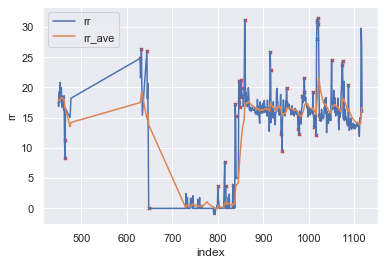

In [17]:
roll_win = 20
# Create rolling window and standard deviation for user 1
df_1 = df[df.user_id == 1]
df_1.rr_ave = rolling_mean(df_1.rr, roll_win, use_exponential=True, com=9.5)
df_1.rr_std = rolling_std(df_1.rr, roll_win, use_exponential=True, com=30)
# Determine outliers that are one standard deviation above or below the rolling mean
outl = df_1[(((df_1.rr > df_1.rr_ave + df_1.rr_std) | (df_1.rr < df_1.rr_ave - df_1.rr_std)) & (df.in_room == True))]

# Plot the rr, the rr rolling mean, and the outliers
df_inroom_1 = df_1[(df.in_room == True)]
ax = df_inroom_1.reset_index()[100:500].plot(x='index', y='rr')
df_inroom_1.reset_index()[100:500].plot(ax=ax, x='index', y='rr_ave')
outl.loc[450:1100].rr.reset_index().plot.scatter(ax=ax, x='index', y='rr', c='r', s=10, marker='x')

/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path

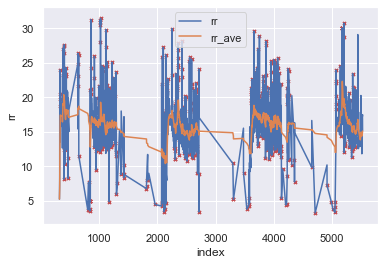

In [27]:
roll_win = 20
# Create rolling window and standard deviation for user 1
user = 1
df_1 = df_inroom_list[user-1][(df.rr > 3)]
df_1.rr_ave = rolling_mean(df_1.rr, roll_win, use_exponential=True, com=20)
df_1.rr_std = rolling_std(df_1.rr, roll_win, use_exponential=True, com=40)
# Determine outliers that are one standard deviation above or below the rolling mean
outl = df_1[(((df_1.rr > df_1.rr_ave + df_1.rr_std) | (df_1.rr < df_1.rr_ave - df_1.rr_std)) & (df.in_room == True))]

# Plot the rr, the rr rolling mean, and the outliers
df_inroom_1 = df_1[(df.in_room == True)]
ax = df_inroom_1.reset_index()[:2200].plot(x='index', y='rr')
df_inroom_1.reset_index()[:2200].plot(ax=ax, x='index', y='rr_ave')
outl.loc[:5400].rr.reset_index().plot.scatter(ax=ax, x='index', y='rr', c='r', s=10, marker='x')

/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path

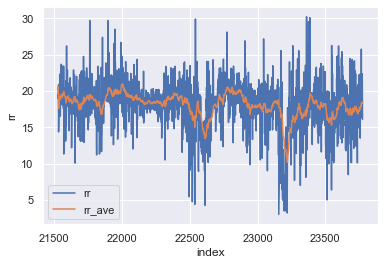

In [35]:
roll_win = 20
# Create rolling window and standard deviation for user 1
user = 4
df_1 = df_inroom_list[user-1][(df.rr > 3)]
df_1.rr_ave = rolling_mean(df_1.rr, roll_win, use_exponential=True, com=20)
df_1.rr_std = rolling_std(df_1.rr, roll_win, use_exponential=True, com=40)
# Determine outliers that are one standard deviation above or below the rolling mean
outl = df_1[(((df_1.rr > df_1.rr_ave + df_1.rr_std) | (df_1.rr < df_1.rr_ave - df_1.rr_std)) & (df.in_room == True))]

# Plot the rr, the rr rolling mean, and the outliers
df_inroom_1 = df_1[(df.in_room == True)]
ax = df_inroom_1.reset_index()[:2200].plot(x='index', y='rr')
df_inroom_1.reset_index()[:2200].plot(ax=ax, x='index', y='rr_ave')
outl.loc[7000:11000].rr.reset_index().plot.scatter(ax=ax, x='index', y='rr', c='r', s=10, marker='x')

/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/bigtyme/anaconda/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path

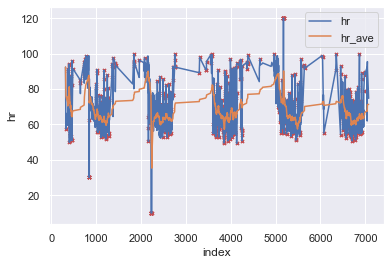

In [37]:
roll_win = 20
# Create rolling window and standard deviation for user 1
user = 1
df_1 = df_inroom_list[user-1][(df.hr > 1)]
df_1.hr_ave = rolling_mean(df_1.hr, roll_win, use_exponential=True, com=20)
df_1.hr_std = rolling_std(df_1.hr, roll_win, use_exponential=True, com=40)
# Determine outliers that are one standard deviation above or below the rolling mean
outl = df_1[(((df_1.hr > df_1.hr_ave + df_1.hr_std) | (df_1.hr < df_1.hr_ave - df_1.hr_std)) & (df.in_room == True))]

# Plot the hr, the hr rolling mean, and the outliers
df_inroom_1 = df_1[(df.in_room == True)]
ax = df_inroom_1.reset_index()[:4000].plot(x='index', y='hr')
df_inroom_1.reset_index()[:4000].plot(ax=ax, x='index', y='hr_ave')
outl.loc[:7000].hr.reset_index().plot.scatter(ax=ax, x='index', y='hr', c='r', s=10, marker='x')